In [7]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from common.util import *

In [8]:
""" seed """
seeds = [1, 2, 3, 4, 5]

""" participant """
names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "self_play"]

""" policy """
name_policy_joint = "greedy"
name_policy_self = "epsilon_greedy"

""" condition """
cond = "2on1" # "1on1", "2on1", "2on1", "3on1", or "3on1"

""" speed """
speed = "slow"

""" reward """
reward_p = "share" # "indiv" or "share"


In [9]:
all_rep_v_p1 = []
all_rep_a_p1 = []
all_rep_color_p1 = []

all_rep_v_p2 = []
all_rep_a_p2 = []
all_rep_color_p2 = []

all_rep_v_p3 = []
all_rep_a_p3 = []
all_rep_color_p3 = []

for name in names: 

    for seed in seeds:

        if name == "self_play":
            
            if cond == "1on1":
                rep = np.load("self_play_results/results_1on1_" + name + "_" +  speed + "_" + name_policy_self + "_seed_" + str(seed) + ".npz", allow_pickle=True)
            elif cond == "2on1":
                rep = np.load("self_play_results/results_2on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy_self + "_seed_" + str(seed) + ".npz", allow_pickle=True)
            elif cond == "3on1":
                rep = np.load("self_play_results/results_3on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy_self + "_seed_" + str(seed) + ".npz", allow_pickle=True)
            
        else:
            if cond == "1on1":
                rep = np.load("joint_play_results/results_1on1_" + name + "_" +  speed + "_" + name_policy_joint + "_seed_" + str(seed) + ".npz", allow_pickle=True)
            elif cond == "2on1":
                rep = np.load("joint_play_results/results_2on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy_joint + "_seed_" + str(seed) + ".npz", allow_pickle=True)
            elif cond == "3on1":
                rep = np.load("joint_play_results/results_3on1_" + name + "_" + reward_p + "_" +  speed + "_" + name_policy_joint + "_seed_" + str(seed) + ".npz", allow_pickle=True)
            
        rep_v_list = np.array(rep["rep_v"]).squeeze()
        rep_a_list = np.array(rep["rep_a"]).squeeze()

        if name == "self_play":
            epis = 100
        else:
            epis = 10
            
        for epi in range(epis):
            
            rep_v_p1 = np.array(rep_v_list[epi][1]).squeeze().reshape(-1, 32)
            rep_a_p1 = np.array(rep_a_list[epi][1]).squeeze().reshape(-1, 32)
            
            if name=="self_play":
                rep_color_p1 = np.zeros(len(rep_v_p1))
            else:
                rep_color_p1 = np.ones(len(rep_v_p1))

            all_rep_v_p1.extend(rep_v_p1)
            all_rep_a_p1.extend(rep_a_p1)
            all_rep_color_p1.extend(rep_color_p1)

            if cond == "2on1" or cond == "3on1":

                rep_v_p2 = np.array(rep_v_list[epi][2]).squeeze().reshape(-1, 32)
                rep_a_p2 = np.array(rep_a_list[epi][2]).squeeze().reshape(-1, 32)
                
                if name=="self_play":
                    rep_color_p2 = np.zeros(len(rep_v_p2))
                else:
                    rep_color_p2 = np.ones(len(rep_v_p2))
                
                all_rep_v_p2.extend(rep_v_p2)
                all_rep_a_p2.extend(rep_a_p2)
                all_rep_color_p2.extend(rep_color_p2)
                
            if cond == "3on1":

                rep_v_p3 = np.array(rep_v_list[epi][3]).squeeze().reshape(-1, 32)
                rep_a_p3 = np.array(rep_a_list[epi][3]).squeeze().reshape(-1, 32)
                
                if name=="self_play":
                    rep_color_p3 = np.zeros(len(rep_v_p3))
                else:
                    rep_color_p3 = np.ones(len(rep_v_p3))
                
                all_rep_v_p3.extend(rep_v_p3)
                all_rep_a_p3.extend(rep_a_p3)
                all_rep_color_p3.extend(rep_color_p3)


(7880, 32)
(13896, 32)
(15824, 32)
(21762, 32)
(31411, 32)
(38527, 32)
(42987, 32)
(50128, 32)
(58818, 32)
(61833, 32)
(87044, 32)


In [10]:
from sklearn.manifold import TSNE

""" seed for t-SNE"""
random_seed = 0
np.random.seed(random_seed)

perp = 50
niter = 500

rep_v_p1_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_v_p1)
rep_a_p1_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_a_p1)

if cond == '2on1' or cond == '3on1':

    rep_v_p2_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_v_p2)
    rep_a_p2_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_a_p2)
    
if cond == '3on1':

    rep_v_p3_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_v_p3)
    rep_a_p3_2d = TSNE(n_components=2, perplexity=perp, n_iter=niter).fit_transform(all_rep_a_p3)

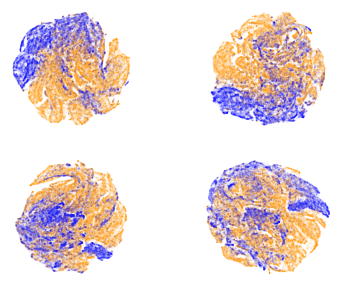

In [11]:
def plot_scatter(ax, data_x, data_y, color, alpha, size):

    ax.scatter(data_x, data_y, c=color, alpha=alpha, s=size, vmin=-0.2, vmax=1.4, cmap="jet")
    ax.set_aspect('equal')
    ax.axis('off')


size = 0.001
alpha = 1

fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(231)

plot_scatter(ax, rep_v_p1_2d[:, 0], rep_v_p1_2d[:, 1], all_rep_color_p1[:], alpha, size)

if cond == '2on1' or cond == '3on1':

    ax = fig.add_subplot(232)
    plot_scatter(ax, rep_v_p2_2d[:, 0], rep_v_p2_2d[:, 1], all_rep_color_p2[:], alpha, size)

if cond == '3on1':
    
    ax = fig.add_subplot(233)
    plot_scatter(ax, rep_v_p3_2d[:, 0], rep_v_p3_2d[:, 1], all_rep_color_p3[:], alpha, size)

ax = fig.add_subplot(234)
plot_scatter(ax, rep_a_p1_2d[:, 0], rep_a_p1_2d[:, 1], all_rep_color_p1[:], alpha, size)

if cond == '2on1' or cond == '3on1':

    ax = fig.add_subplot(235)
    plot_scatter(ax, rep_a_p2_2d[:, 0], rep_a_p2_2d[:, 1], all_rep_color_p2[:], alpha, size)

if cond == '3on1':

    ax = fig.add_subplot(236)
    plot_scatter(ax, rep_a_p3_2d[:, 0], rep_a_p3_2d[:, 1], all_rep_color_p3[:], alpha, size)
